<a href="https://colab.research.google.com/github/sahinozan/Titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preparation

### 1.1 Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

#### Optional Style Settings

In [66]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

### 1.2 Load Dataset

In [67]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sahinozan/Titanic/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/sahinozan/Titanic/master/test.csv')

In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.3 Checking Null Values

In [70]:
pd.DataFrame(data=[df_train.isna().sum(), df_test.isna().sum()], index=['Train', 'Test']).T

,Train,Test
PassengerId,0.0,0.0
Survived,0.0,NaN
Pclass,0.0,0.0
Name,0.0,0.0
Sex,0.0,0.0
Age,177.0,86.0
SibSp,0.0,0.0
Parch,0.0,0.0
Ticket,0.0,0.0
Fare,0.0,1.0


**Age** and **Cabin** features have too many null values. **Embarked** feature has 2 null values in Train data. **Fare** feature has a single null value in Test data.

### 1.4 Checking Duplicate Values

In [71]:
print(f'Number of duplicate values in train data: {df_train.duplicated().sum()}')
print(f'Number of duplicate values in test data: {df_test.duplicated().sum()}')

Number of duplicate values in train data: 0
Number of duplicate values in test data: 0


There are no duplicate values in train and test data.

### 1.5 Checking Dataset Features

In [72]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have 12 features in the dataset.
* **PassengerId**: Identification number of the passenger
* **Survival**: Whether a passenger survived or not (0 or 1)
* **Pclass**: The socio-economic class
    * Upper: 1
    * Middle 2
    * Lower: 3
* **Name**: Name of the passenger
* **Sex**: Gender of the passenger (Male or Female)
* **Age**: Age of the passenger in years
* **SibSp**: Number of siblings / spouses aboard
* **Parch**: Number of parents / children aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin Number
* **Embarked**: Port of Embarkation
    * C: Cherbourg
    * Q: Queenstown
    * S: Southampton


Numerical:
* **Age**, **SibSp**, **Parch**, and **Fare**

Categorical:
* **Survival**, **Pclass**, **Sex**, **Ticket**, **Cabin**, and **Embarked**, **Name**, **PassengerId**

**Name**, **Sex**, **Ticket**, **Cabin**, and **Embarked** features are `object` type. **Sex** and **Embarked** features consists of only a few values therefore, we will convert them into the `category` type to increase efficiency. 

> **Name**, **Ticket**, and **Cabin** features will not be in the training set so, we will not convert them into `category` type.

In [74]:
df_train[['Sex', 'Embarked']] = df_train[['Sex', 'Embarked']].astype('category') 

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


## 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

We will analyze and visualize features separately to understand the data in depth. We will use bar plot and pie chart for `categorical` features. We will use histogram and box plot for `numerical` features.

#### 2.1.1 Analysis of Survived

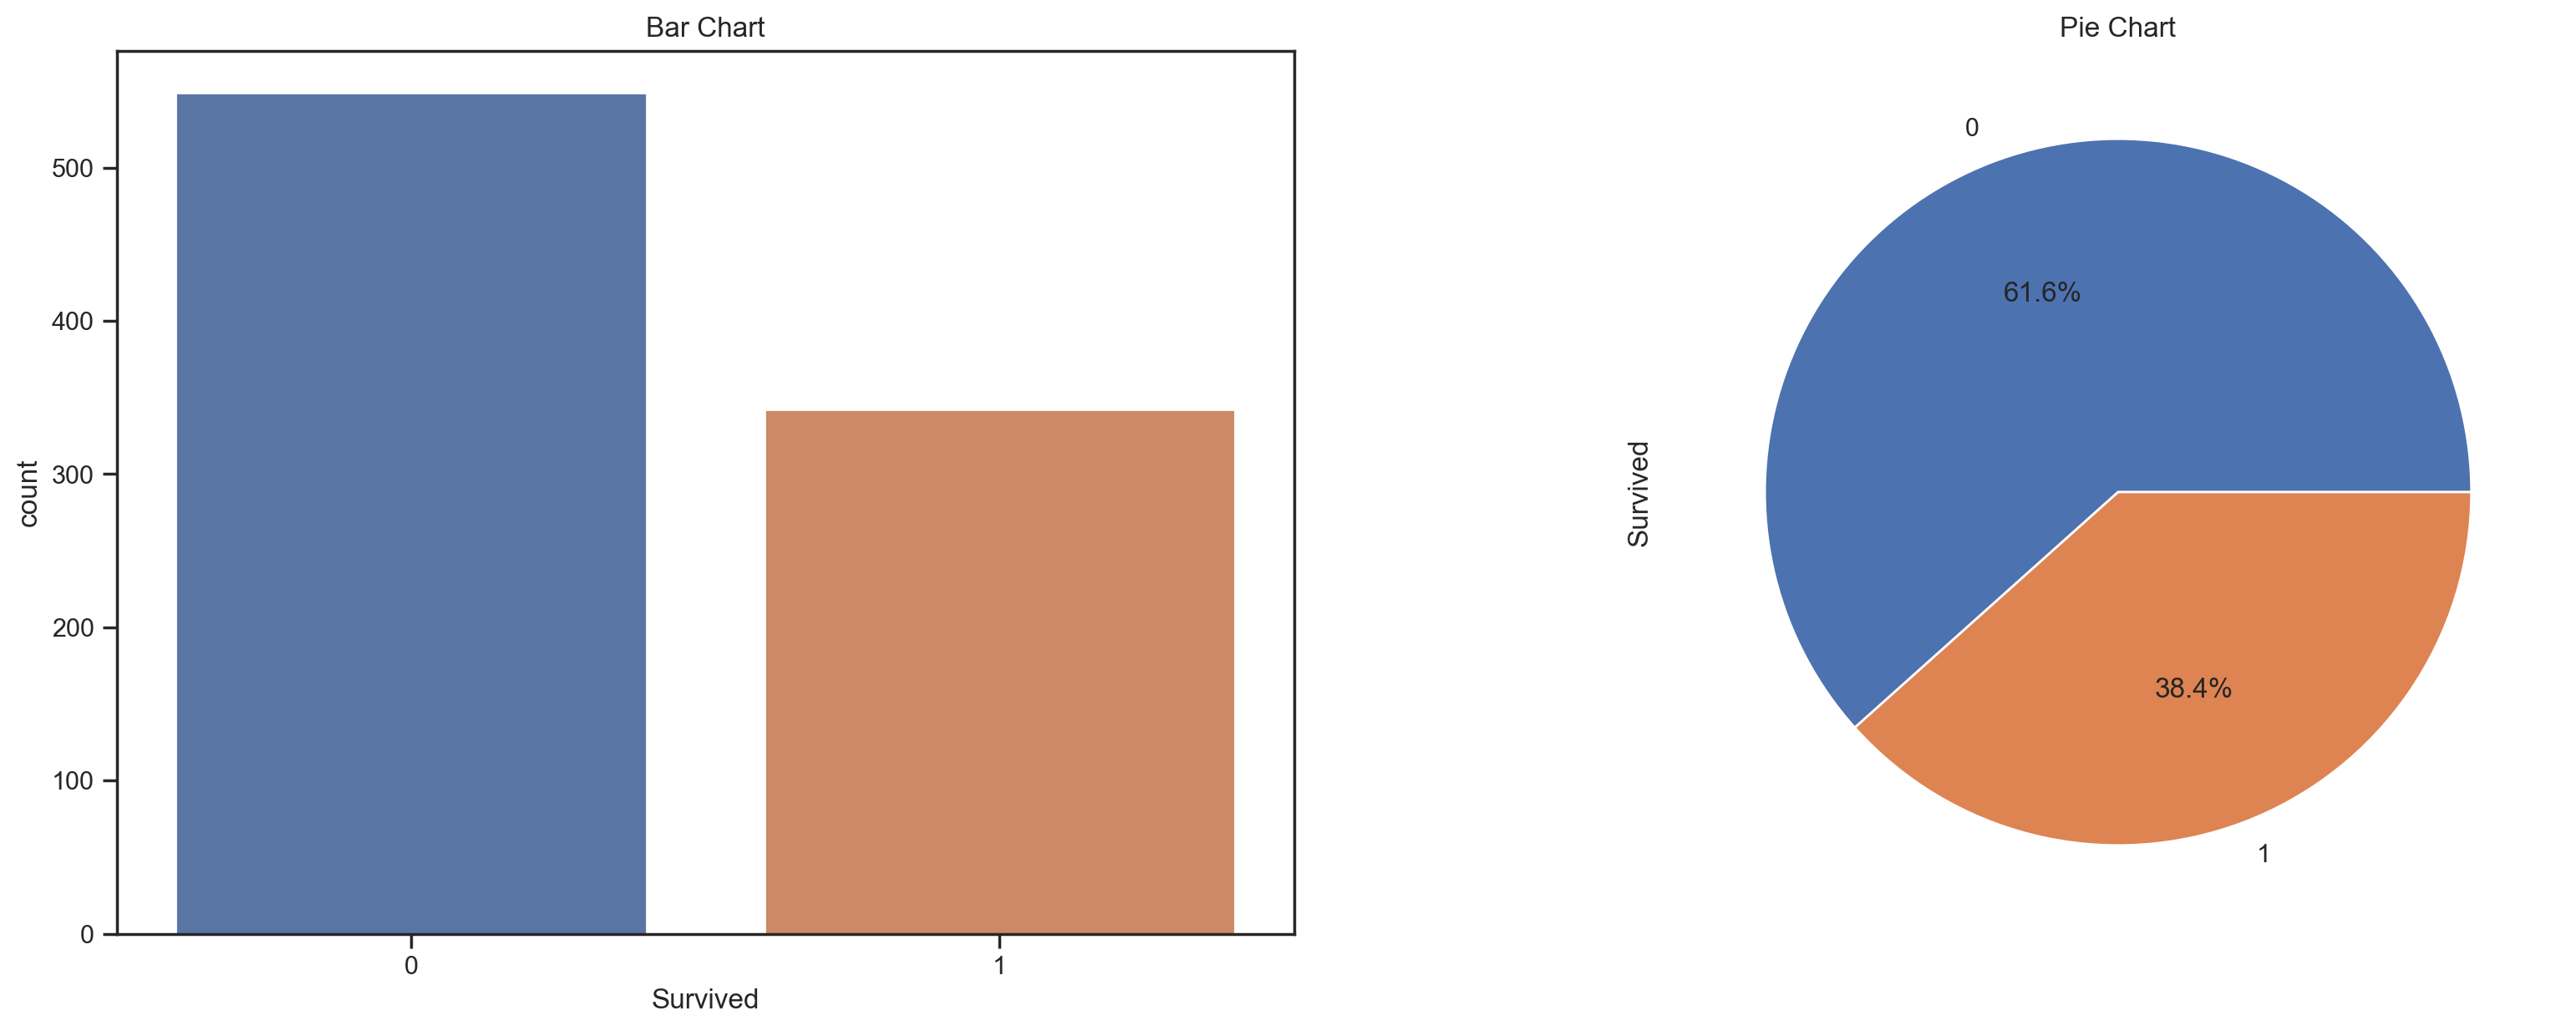

In [76]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data=df_train, x='Survived', ax=ax[0])
ax[0].set_title('Bar Chart')

df_train['Survived'].value_counts().plot(kind='pie', autopct="%1.1f%%", ax=ax[1])
ax[1].set_title('Pie Chart')
plt.show()

We will analyze to find out what caused **38.4%** of the passengers to survive.
* **61.6%** of the passengers did **not** survive. 
* Only **38.4%** of the passengers did survive.

#### 2.1.2 Analysis of Sex

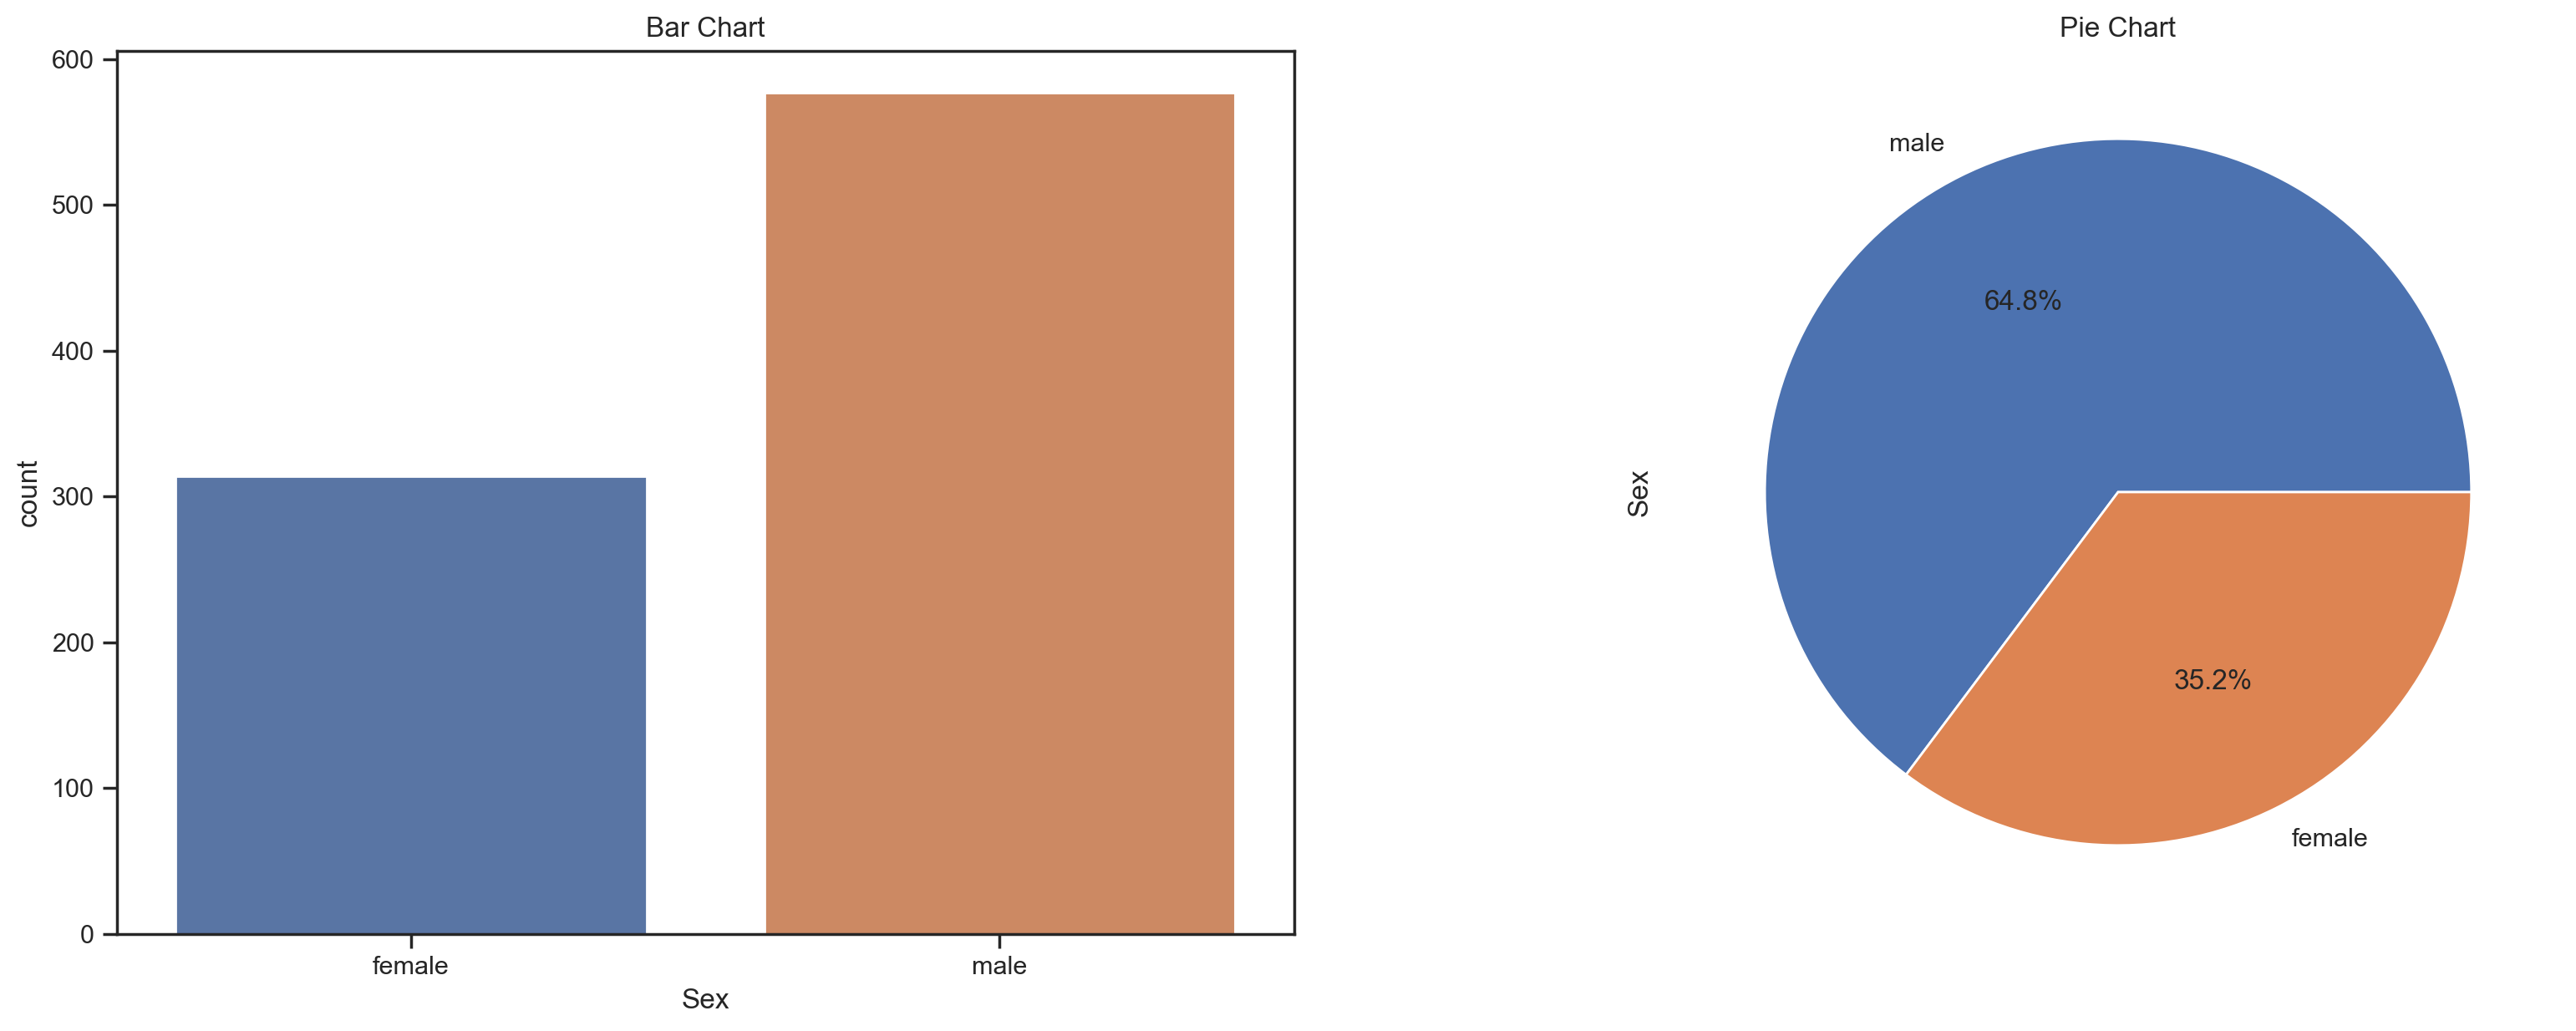

In [77]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data=df_train, x='Sex', ax=ax[0])
ax[0].set_title('Bar Chart')

df_train['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%", ax=ax[1])
ax[1].set_title('Pie Chart')
plt.show()

* **64.8%** of the passengers are **Male**.
* Only **35.2%** of the passengers are **Female**.

#### 2.1.3 Analysis of Age

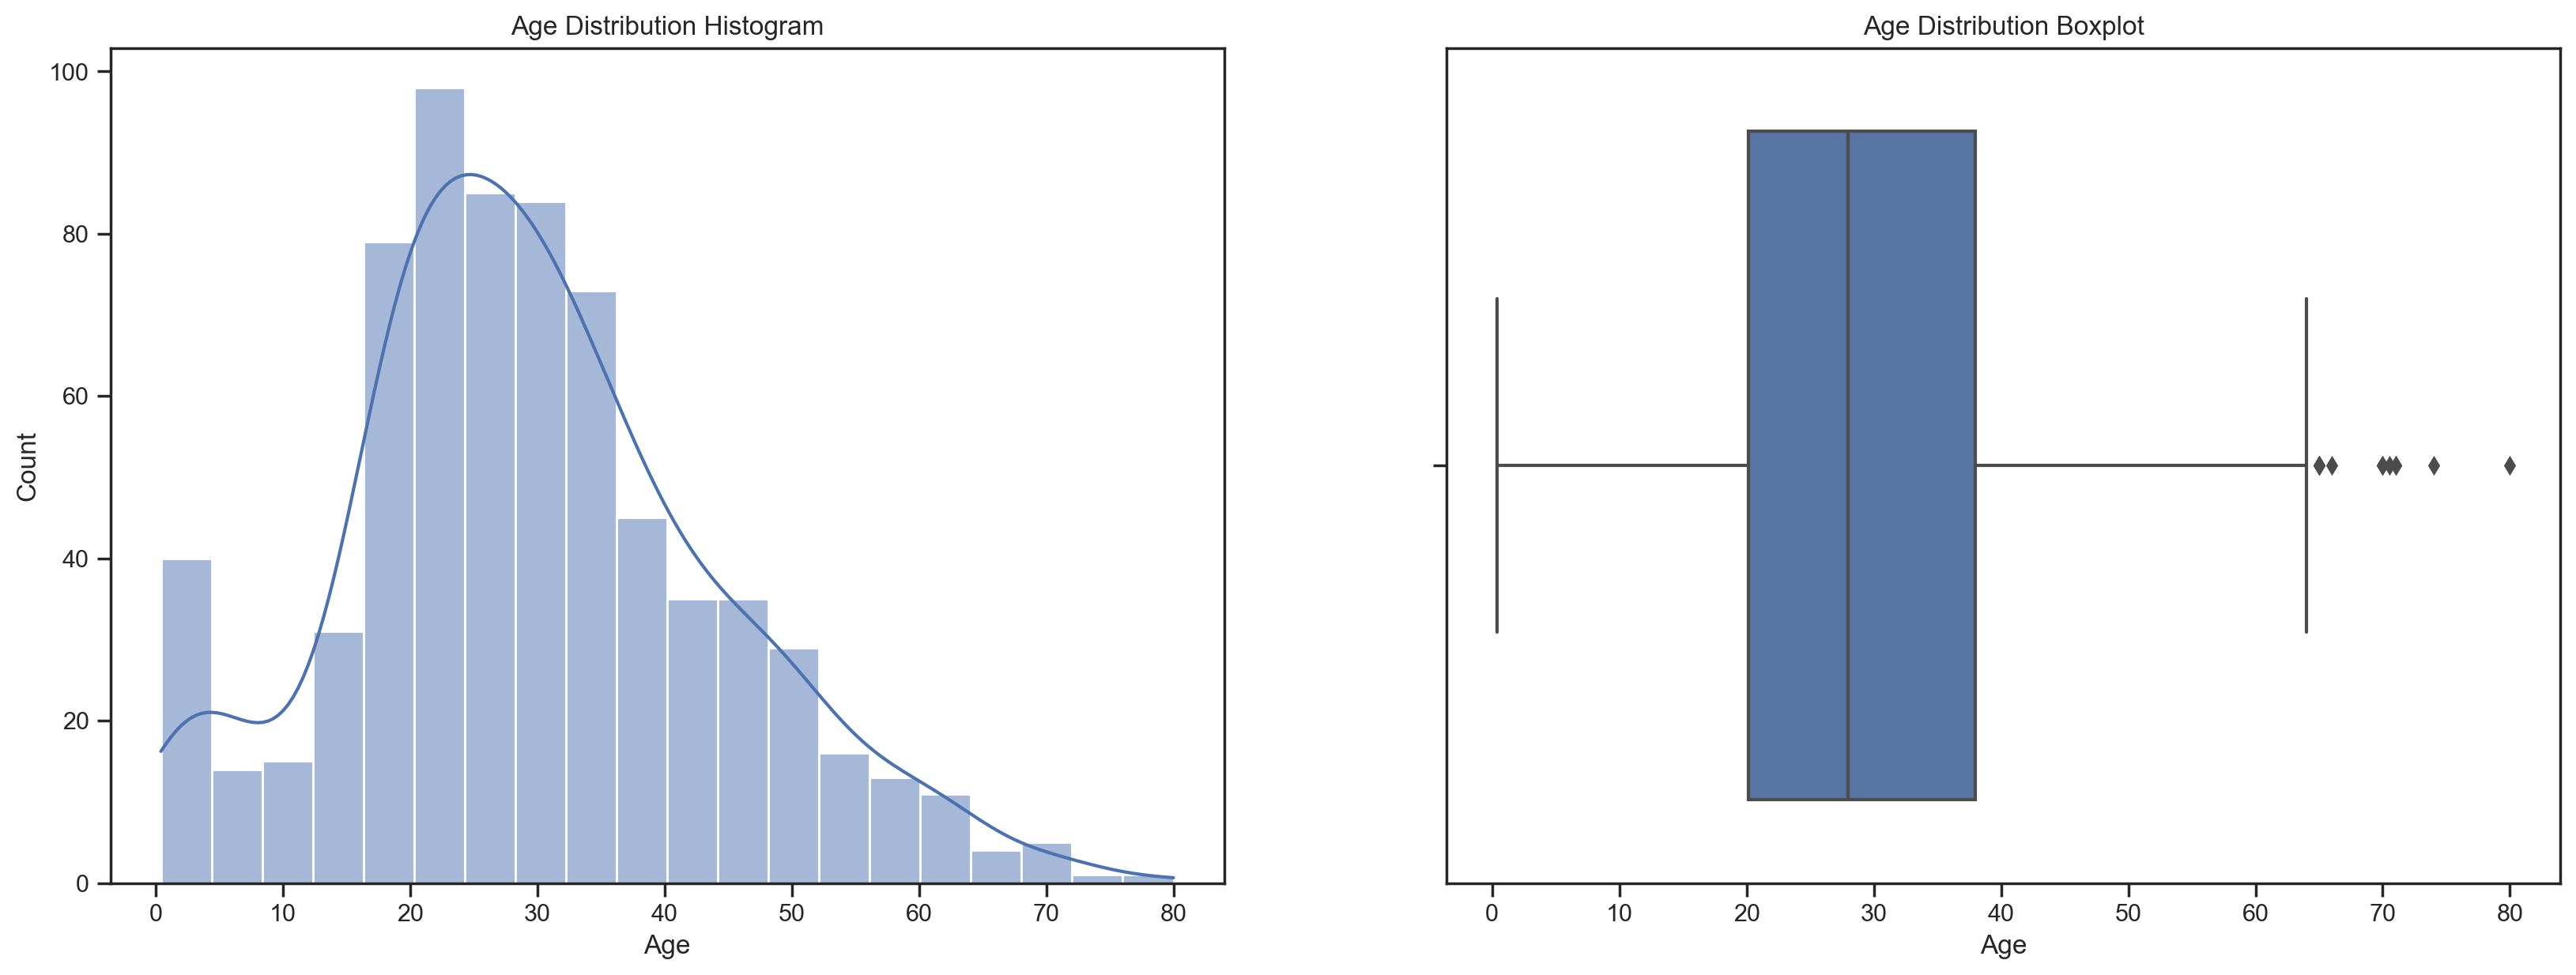

In [78]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_train, x='Age', kde=True, ax=ax[0])
ax[0].set_title('Age Distribution Histogram')

sns.boxplot(data=df_train, x='Age', ax=ax[1])
ax[1].set_title('Age Distribution Boxplot')
plt.show()

In [79]:
print(f'Average Age: {df_train["Age"].mean()}')
print(f'Lowest Age: {df_train["Age"].min()}')
print(f'Highest Age: {df_train["Age"].max()}')

Average Age: 29.69911764705882
Lowest Age: 0.42
Highest Age: 80.0


In [80]:
number_of_people = max(dict(df_train["Age"].value_counts()).values())
most_frequent_age = [key for key, value in dict(df_train["Age"].value_counts()).items() if value == number_of_people]
print(f'Most frequent age is {most_frequent_age[0]} with {number_of_people} passengers.')

Most frequent age is 24.0 with 30 passengers.


Age of the passengers varies from **0.42** to **80** years with an average of **29.7**. 

#### 2.1.4 Analysis of Fare

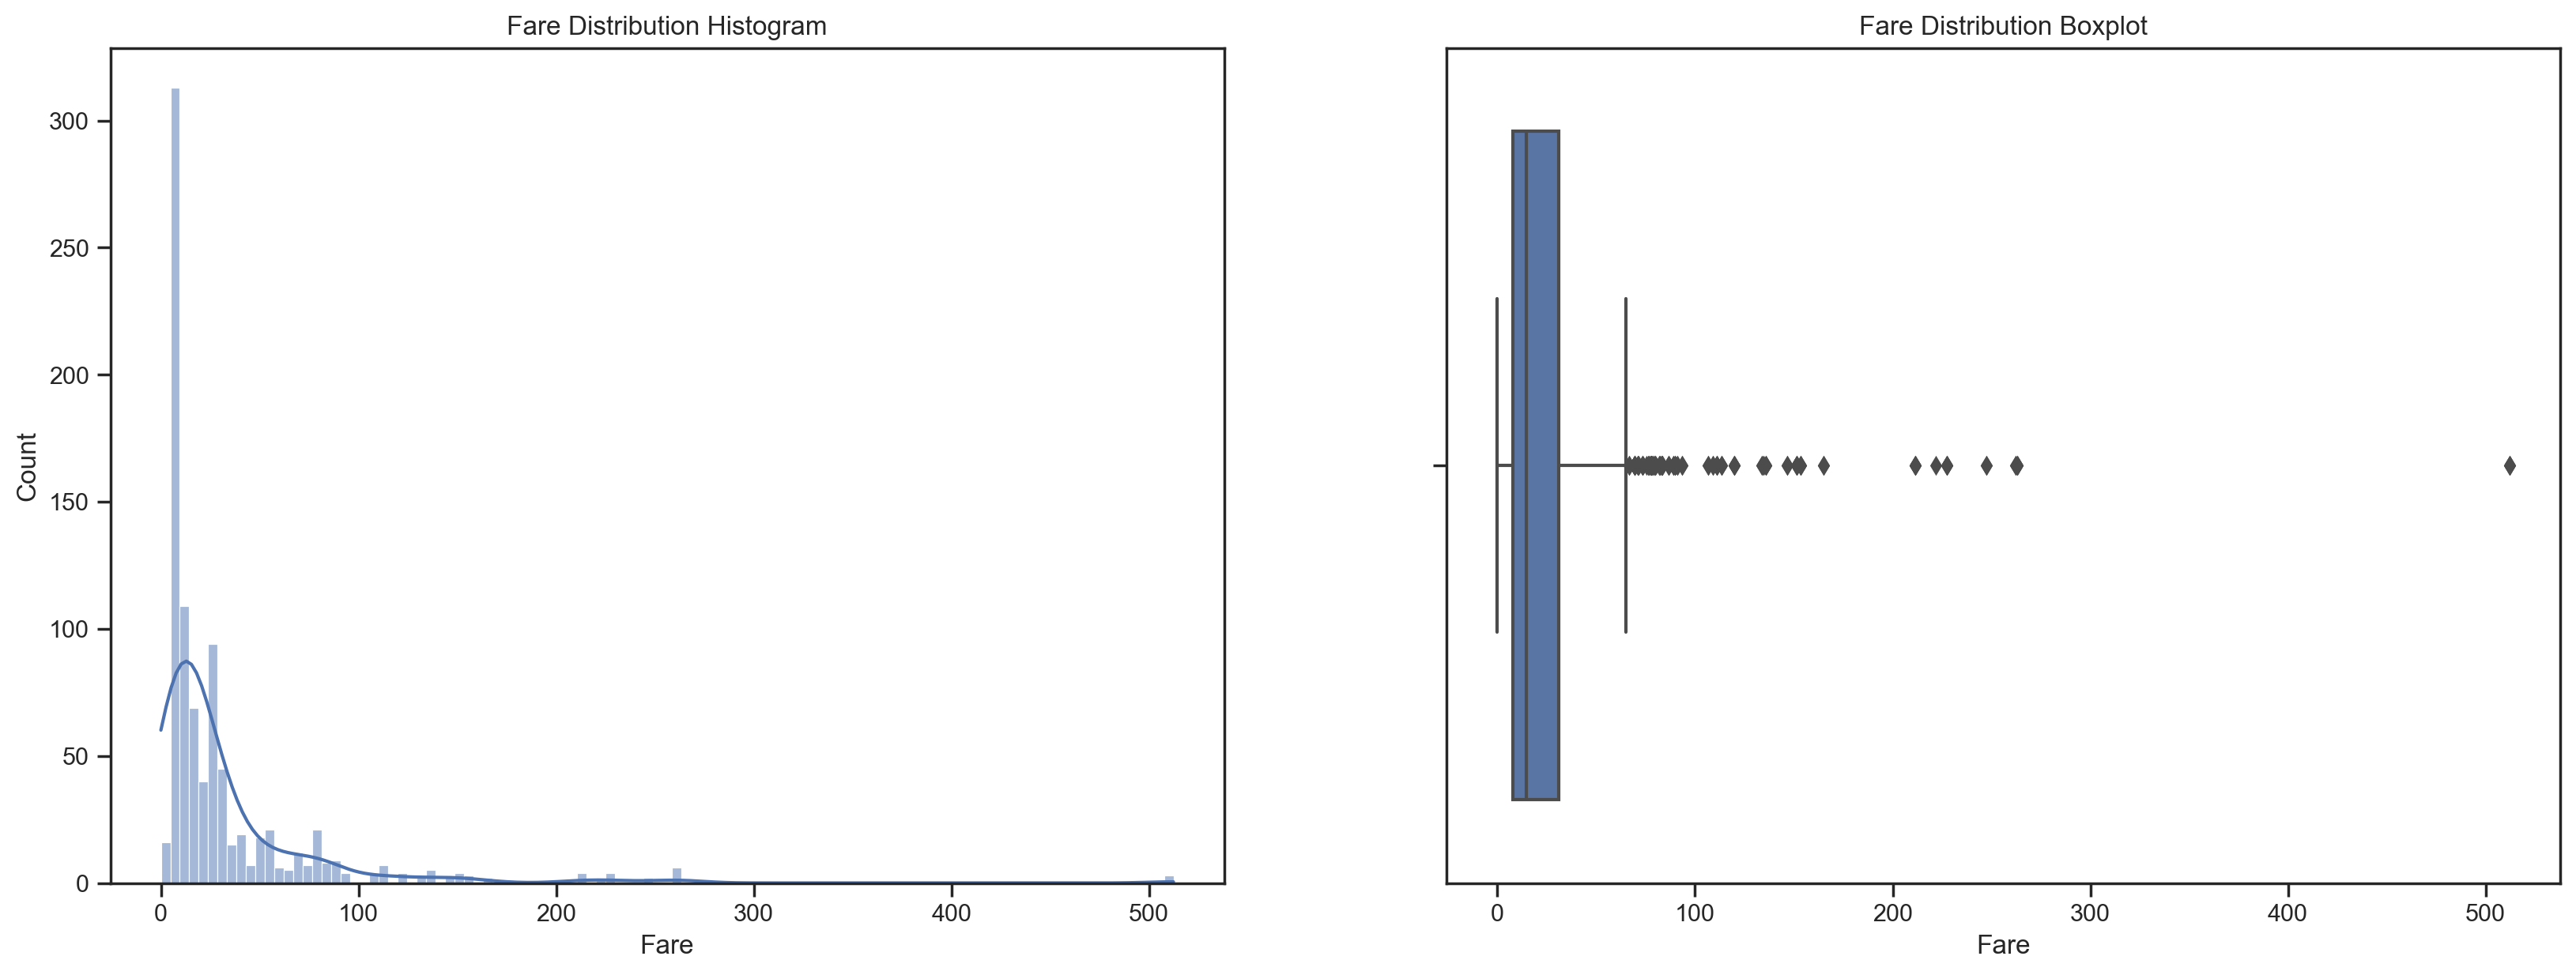

In [81]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df_train, x='Fare', kde=True, ax=ax[0])
ax[0].set_title('Fare Distribution Histogram')

sns.boxplot(data=df_train, x='Fare', ax=ax[1])
ax[1].set_title('Fare Distribution Boxplot')
plt.show()

In [82]:
print(f'Average Fare: ${df_train["Fare"].mean():.2f}')
print(f'Lowest Fare: ${df_train["Fare"].min()}')
print(f'Highest Fare: ${df_train["Fare"].max():.2f}')

Average Fare: $32.20
Lowest Fare: $0.0
Highest Fare: $512.33


In [83]:
print('Number of passengers who paid $0.0: ', df_train[df_train["Fare"] == df_train["Fare"].min()].shape[0])
print('Number of passengers who paid $512.33: ', df_train[df_train["Fare"] == df_train["Fare"].max()].shape[0])

Number of passengers who paid $0.0:  15
Number of passengers who paid $512.33:  3


In [84]:
number_of_people = max(dict(df_train["Fare"].value_counts()).values())
most_frequent_fare = [key for key, value in dict(df_train["Fare"].value_counts()).items() if value == number_of_people]
print(f'Most frequent fare is ${most_frequent_fare[0]} which is paid by {number_of_people} passengers.')

Most frequent fare is $8.05 which is paid by 43 passengers.


* There are passengers who did **not** pay for the cruise. 
* Only 3 passengers paid **\$512.33**.
* 15 passengers paid **\$0.0**. 
* Average fare is **$32.2**. 

#### 2.1.5 Analysis of Pclass

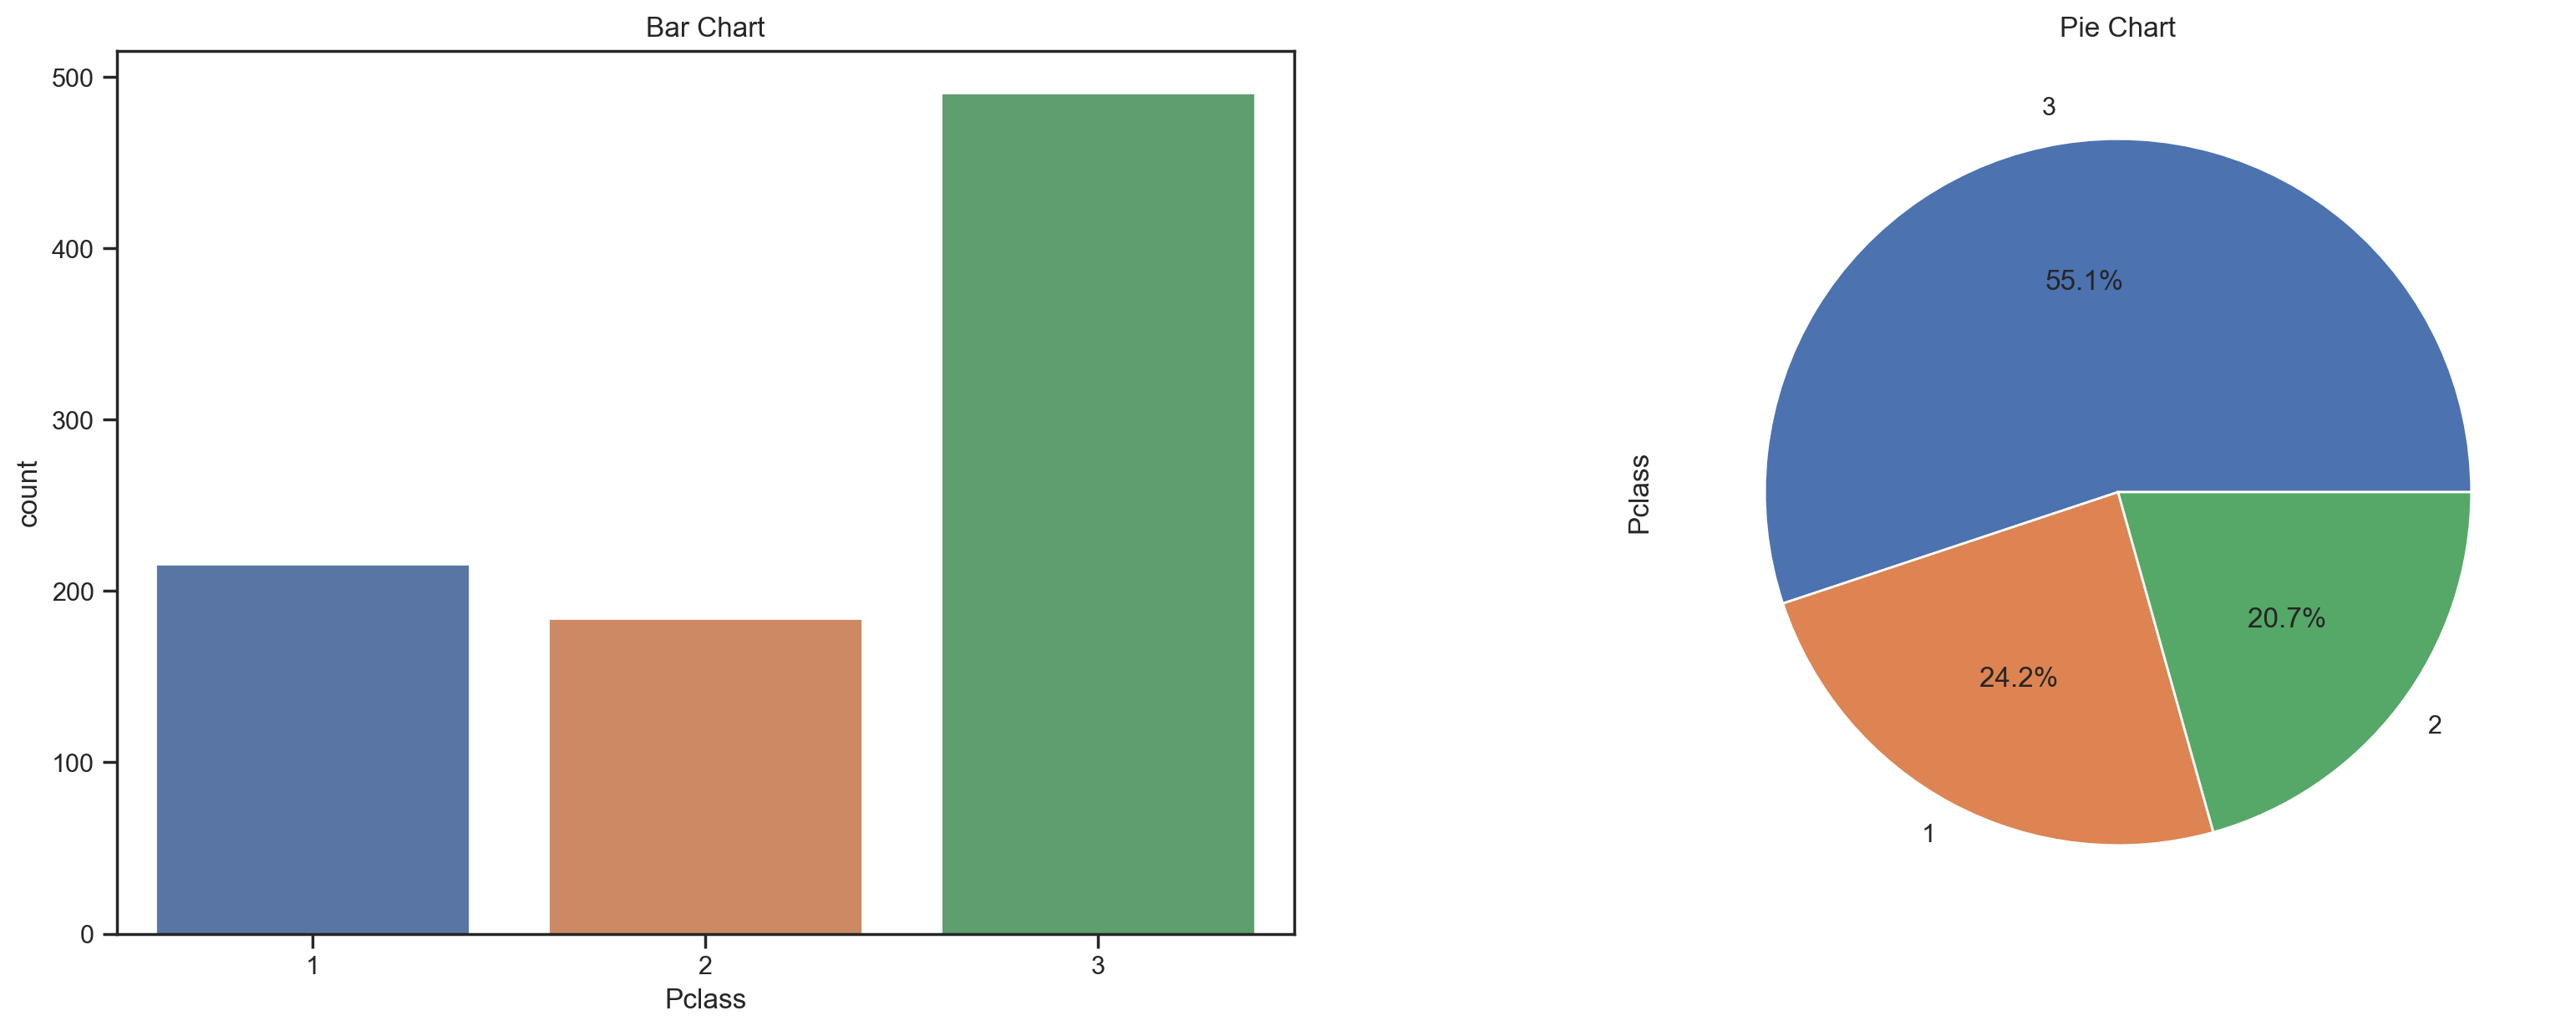

In [85]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data=df_train, x='Pclass', ax=ax[0])
ax[0].set_title('Bar Chart')

df_train['Pclass'].value_counts().plot(kind='pie', autopct="%1.1f%%", ax=ax[1])
ax[1].set_title('Pie Chart')
plt.show()

**55.1%** of the passengers have 3rd class ticket. Meanwhile, the number of passengers who have 1st and 2nd class ticket are quite close with **24.2%** and **20.7%** respectively.

#### 2.1.6 Analysis of SibSp and Parch

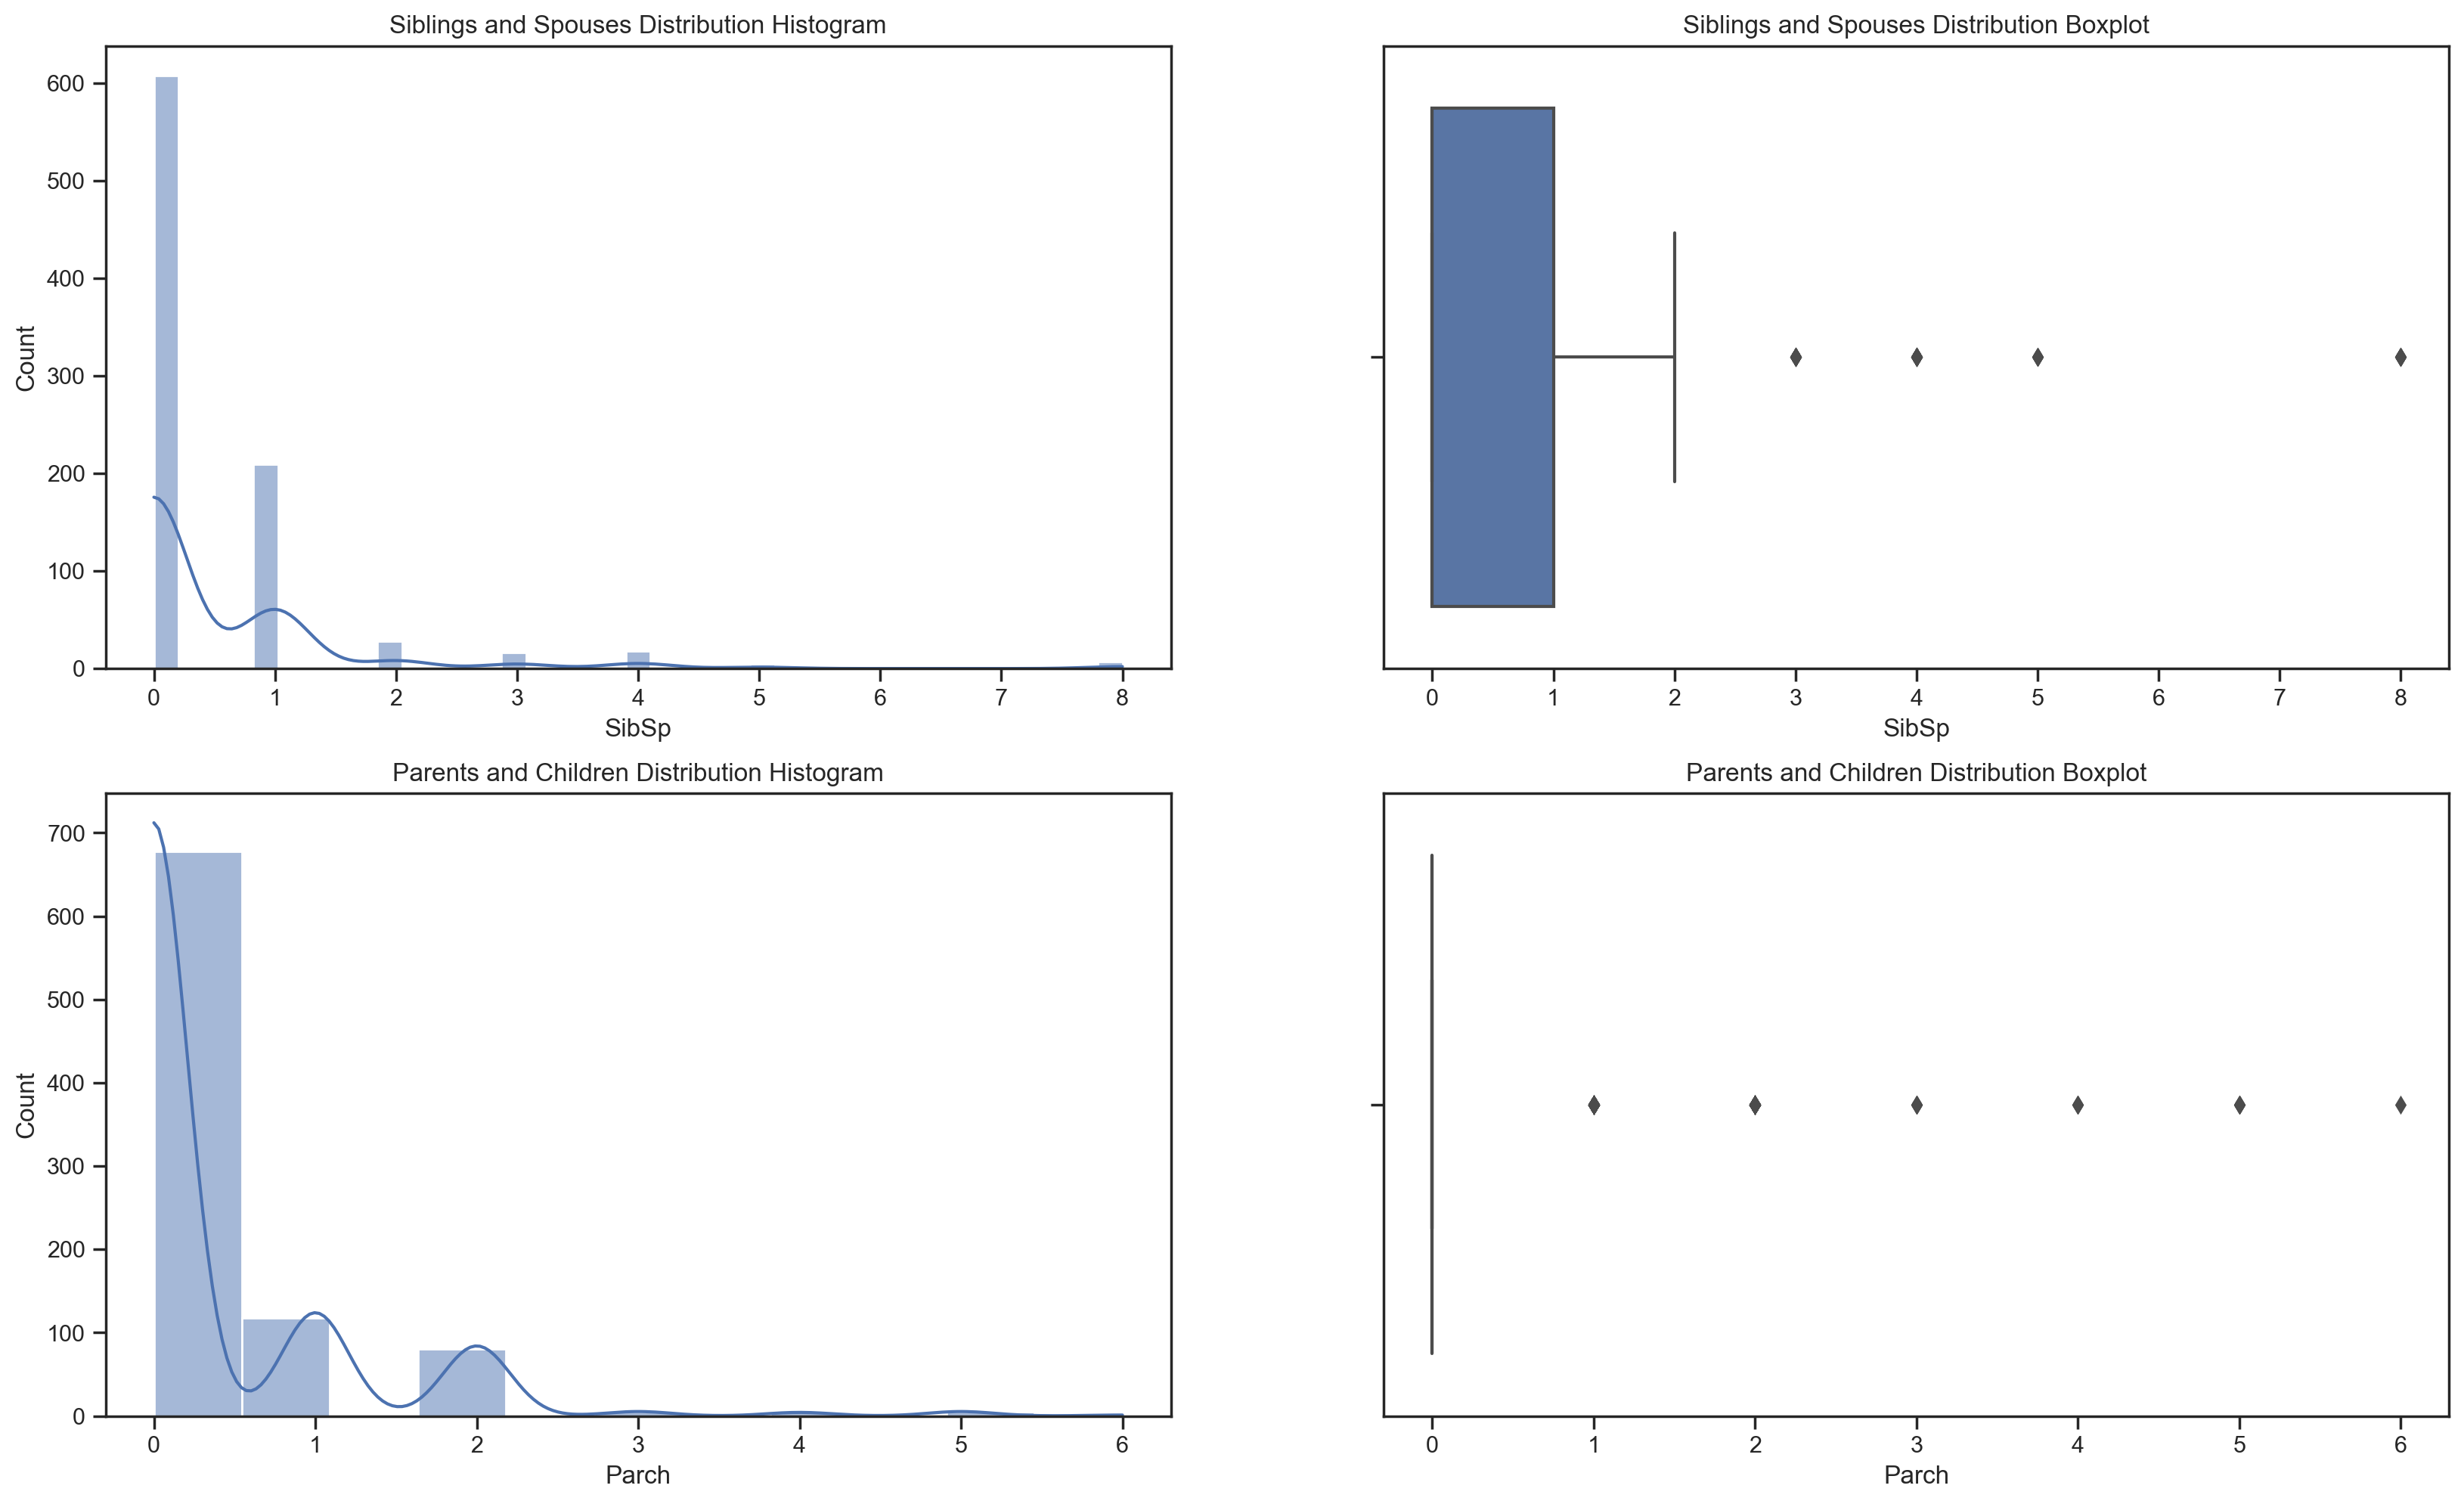

In [86]:
_, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.histplot(data=df_train, x='SibSp', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Siblings and Spouses Distribution Histogram')

sns.boxplot(data=df_train, x='SibSp', ax=ax[0, 1])
ax[0, 1].set_title('Siblings and Spouses Distribution Boxplot')

sns.histplot(data=df_train, x='Parch', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Parents and Children Distribution Histogram')

sns.boxplot(data=df_train, x='Parch', ax=ax[1, 1])
ax[1, 1].set_title('Parents and Children Distribution Boxplot')

plt.show()

* Over **600** passengers traveling alone. 
* There are also over **100** passengers traveling with 1 person.

#### 2.1.7 Analysis of Embarked

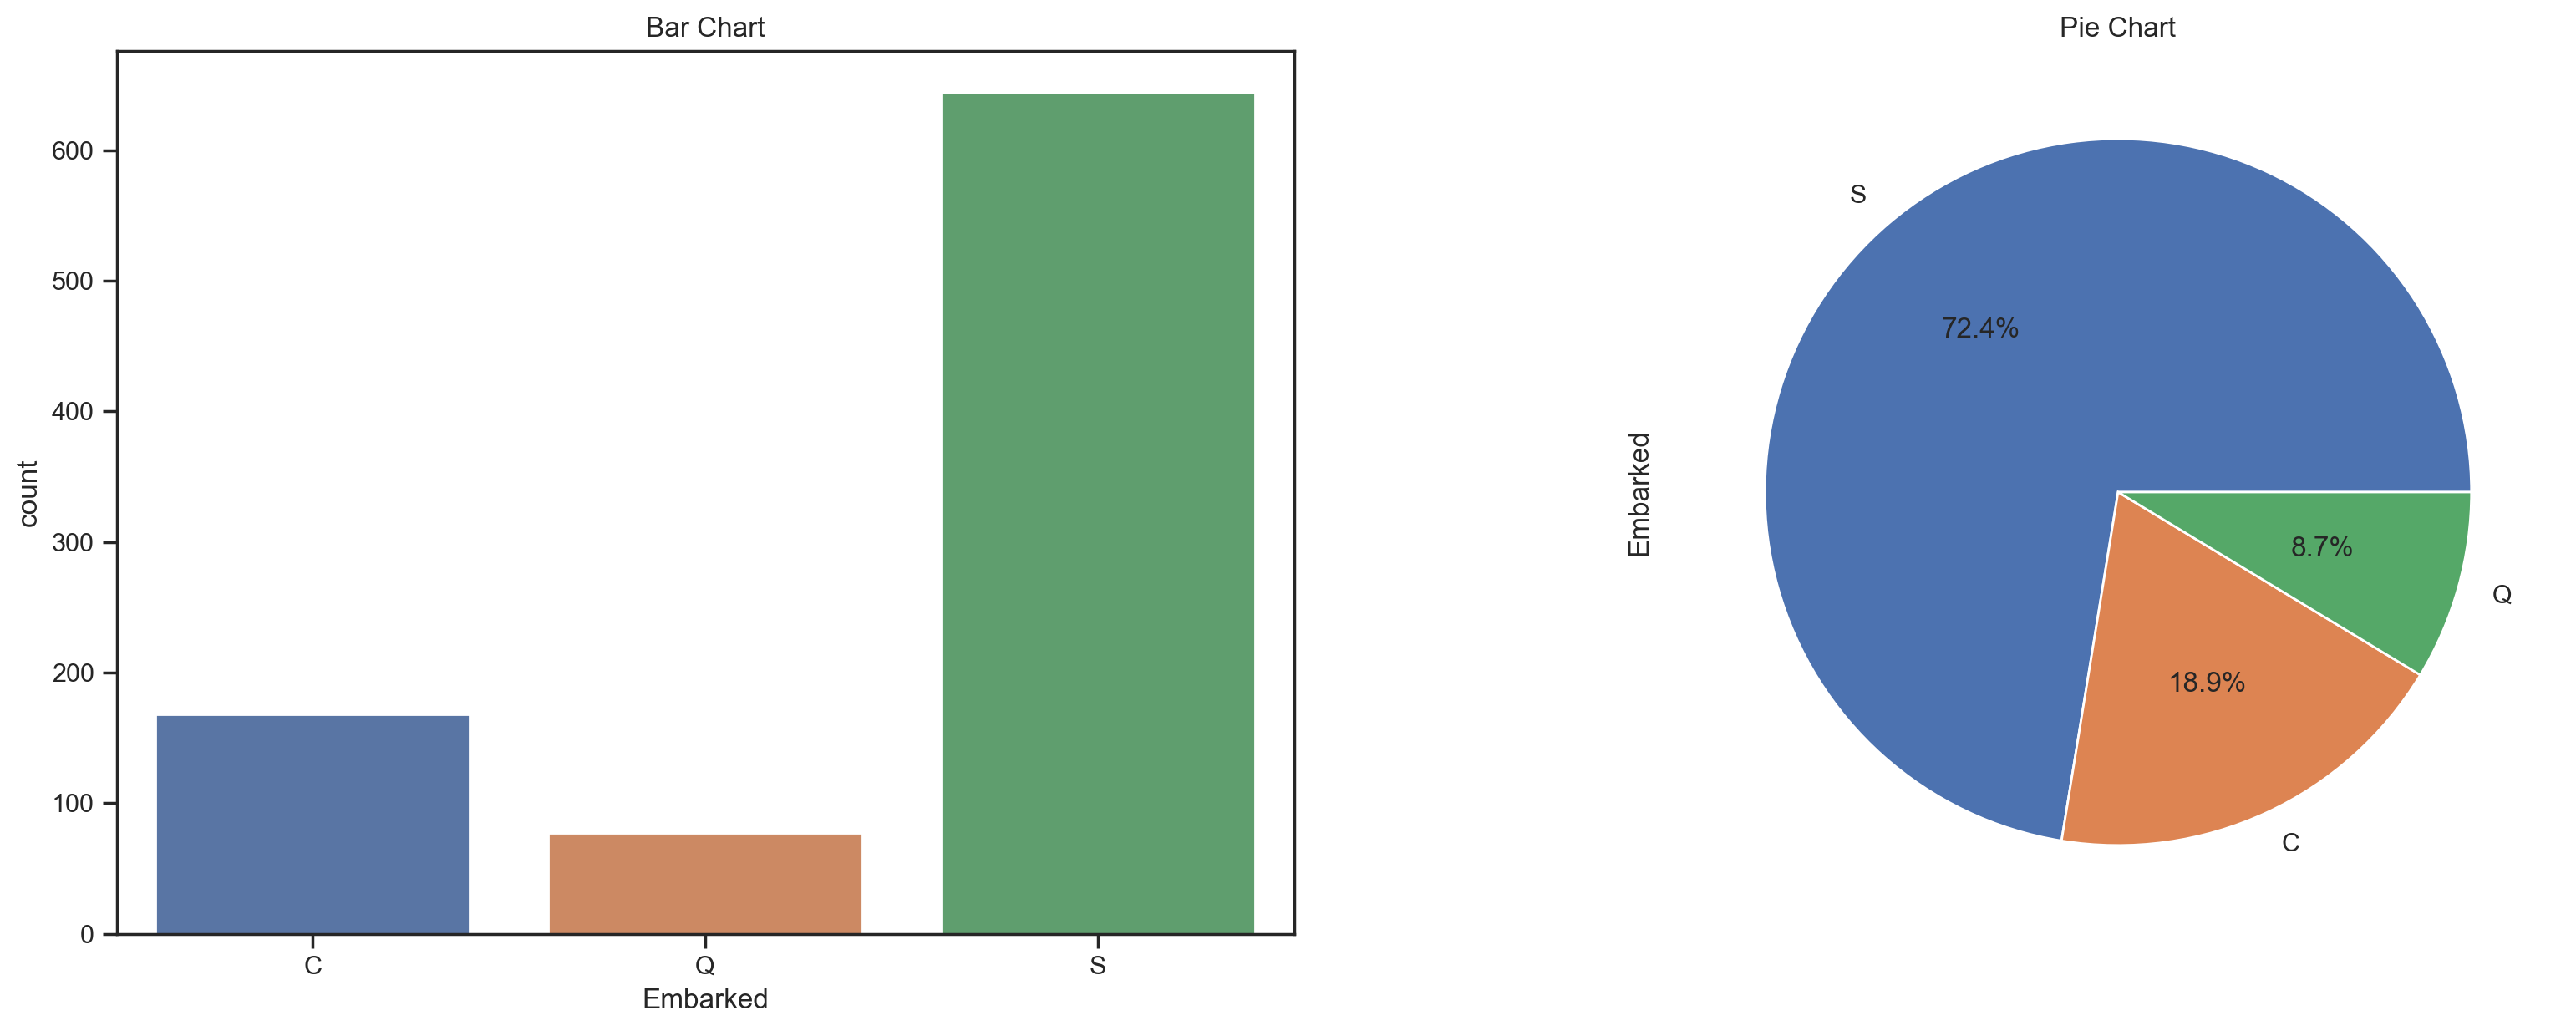

In [87]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data=df_train, x='Embarked', ax=ax[0])
ax[0].set_title('Bar Chart')

df_train['Embarked'].value_counts().plot(kind='pie', autopct="%1.1f%%", ax=ax[1])
ax[1].set_title('Pie Chart')
plt.show()

Most of the passengers, approximately **72.4%** boarded the Titanic from Southampton.


### 2.2 Multivariate Analysis

#### 2.2.1 Analysis of Survived and Age

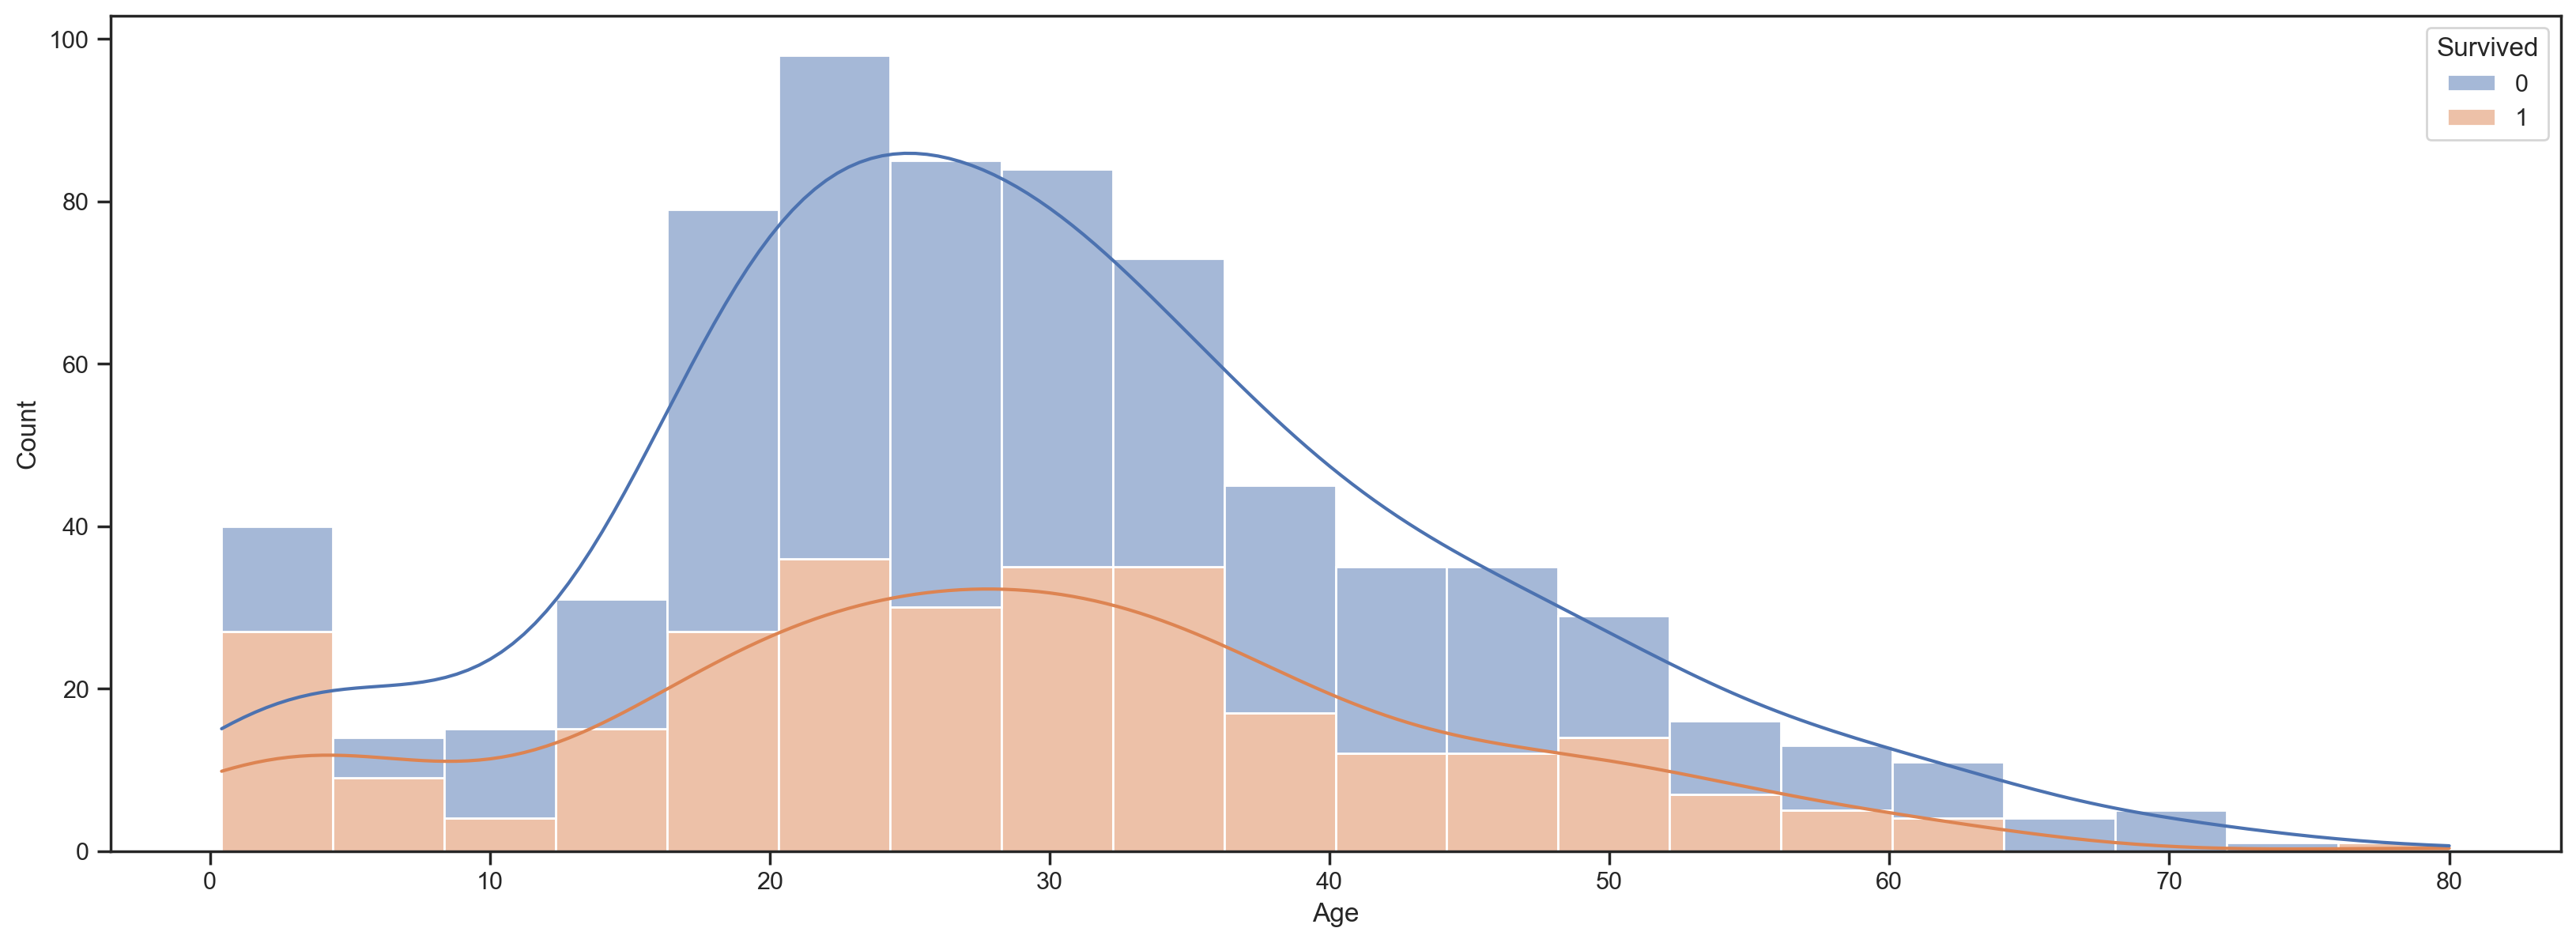

In [88]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()

In [89]:
number_of_survival_under_10 = df_train[(df_train['Age'] <= 10) & (df_train['Survived'] == 1)].shape[0]
number_of_survival_over_65 = df_train[(df_train['Age'] >= 65) & (df_train['Survived'] == 1)].shape[0]

In [90]:
print(f'Number of people survived in 0-10 age range: {number_of_survival_under_10}')
print(f'Number of people survived in 65+ age range: {number_of_survival_over_65}')

Number of people survived in 0-10 age range: 38
Number of people survived in 65+ age range: 1


* The **0-10** age range has a higher rate of survival. Maybe kids had a higher priority for the lifeboats.
* The **65+** age range has an extremely low rate of survival. This outcome may have happened because elders have a relatively low physical capacity to survive.

#### 2.2.2 Analysis of Survived and Sex

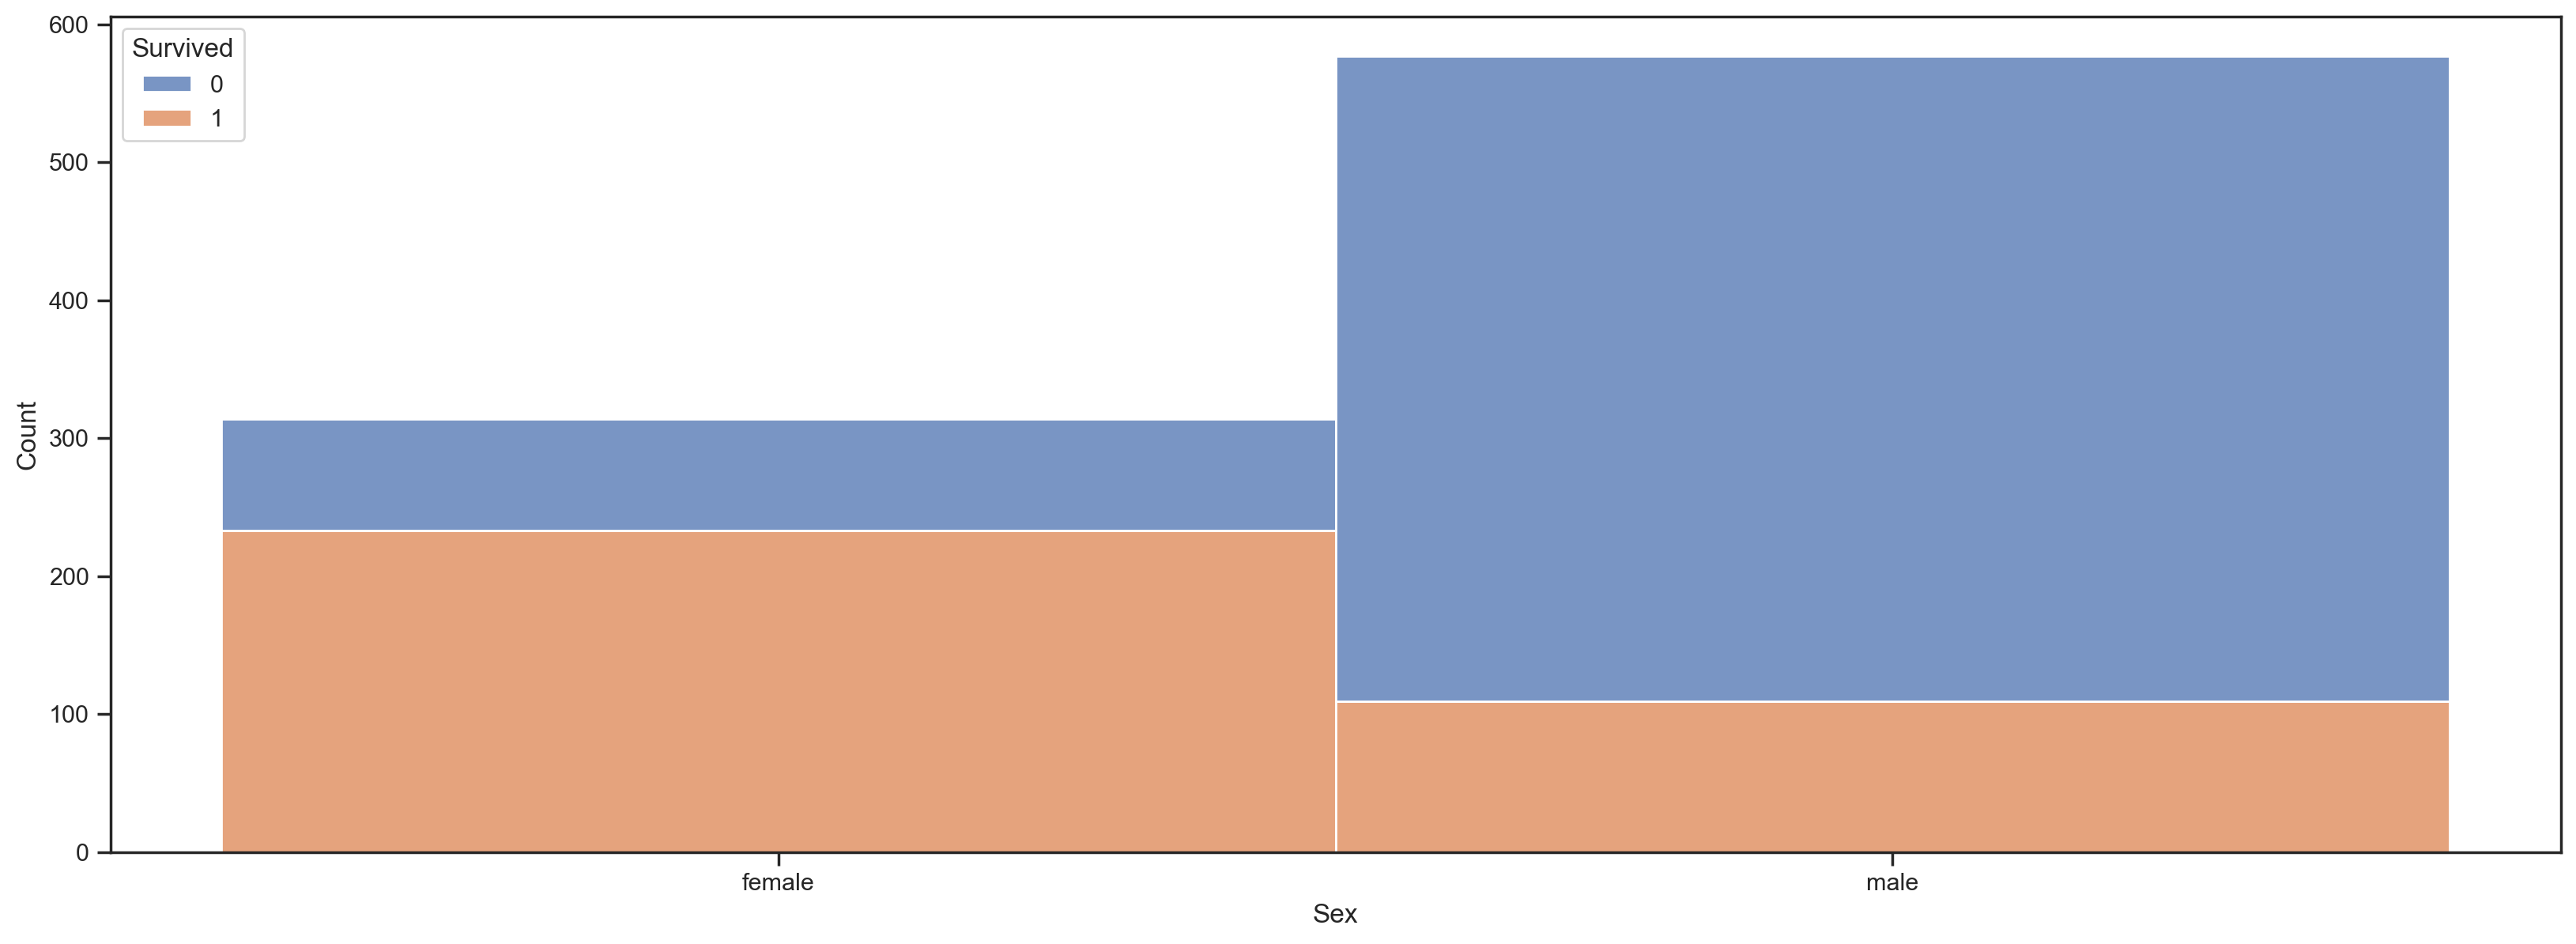

In [91]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df_train, x='Sex', hue='Survived', multiple='stack')
plt.show()

In [92]:
for i in ['female', 'male']:
    survived = df_train[(df_train['Sex'] == i) & (df_train['Survived'] == 1)].shape[0]
    total = df_train[df_train['Sex'] == i].shape[0]
    print(f'{survived / total * 100 :.2f}% of the {i} passengers survived.')

74.20% of the female passengers survived.
18.89% of the male passengers survived.


* Most of the survivors are **female**. 
* Huge amount of female passengers survived.
* Small amount of male passengers survived.

#### 2.2.3 Analysis of Survived and Pclass

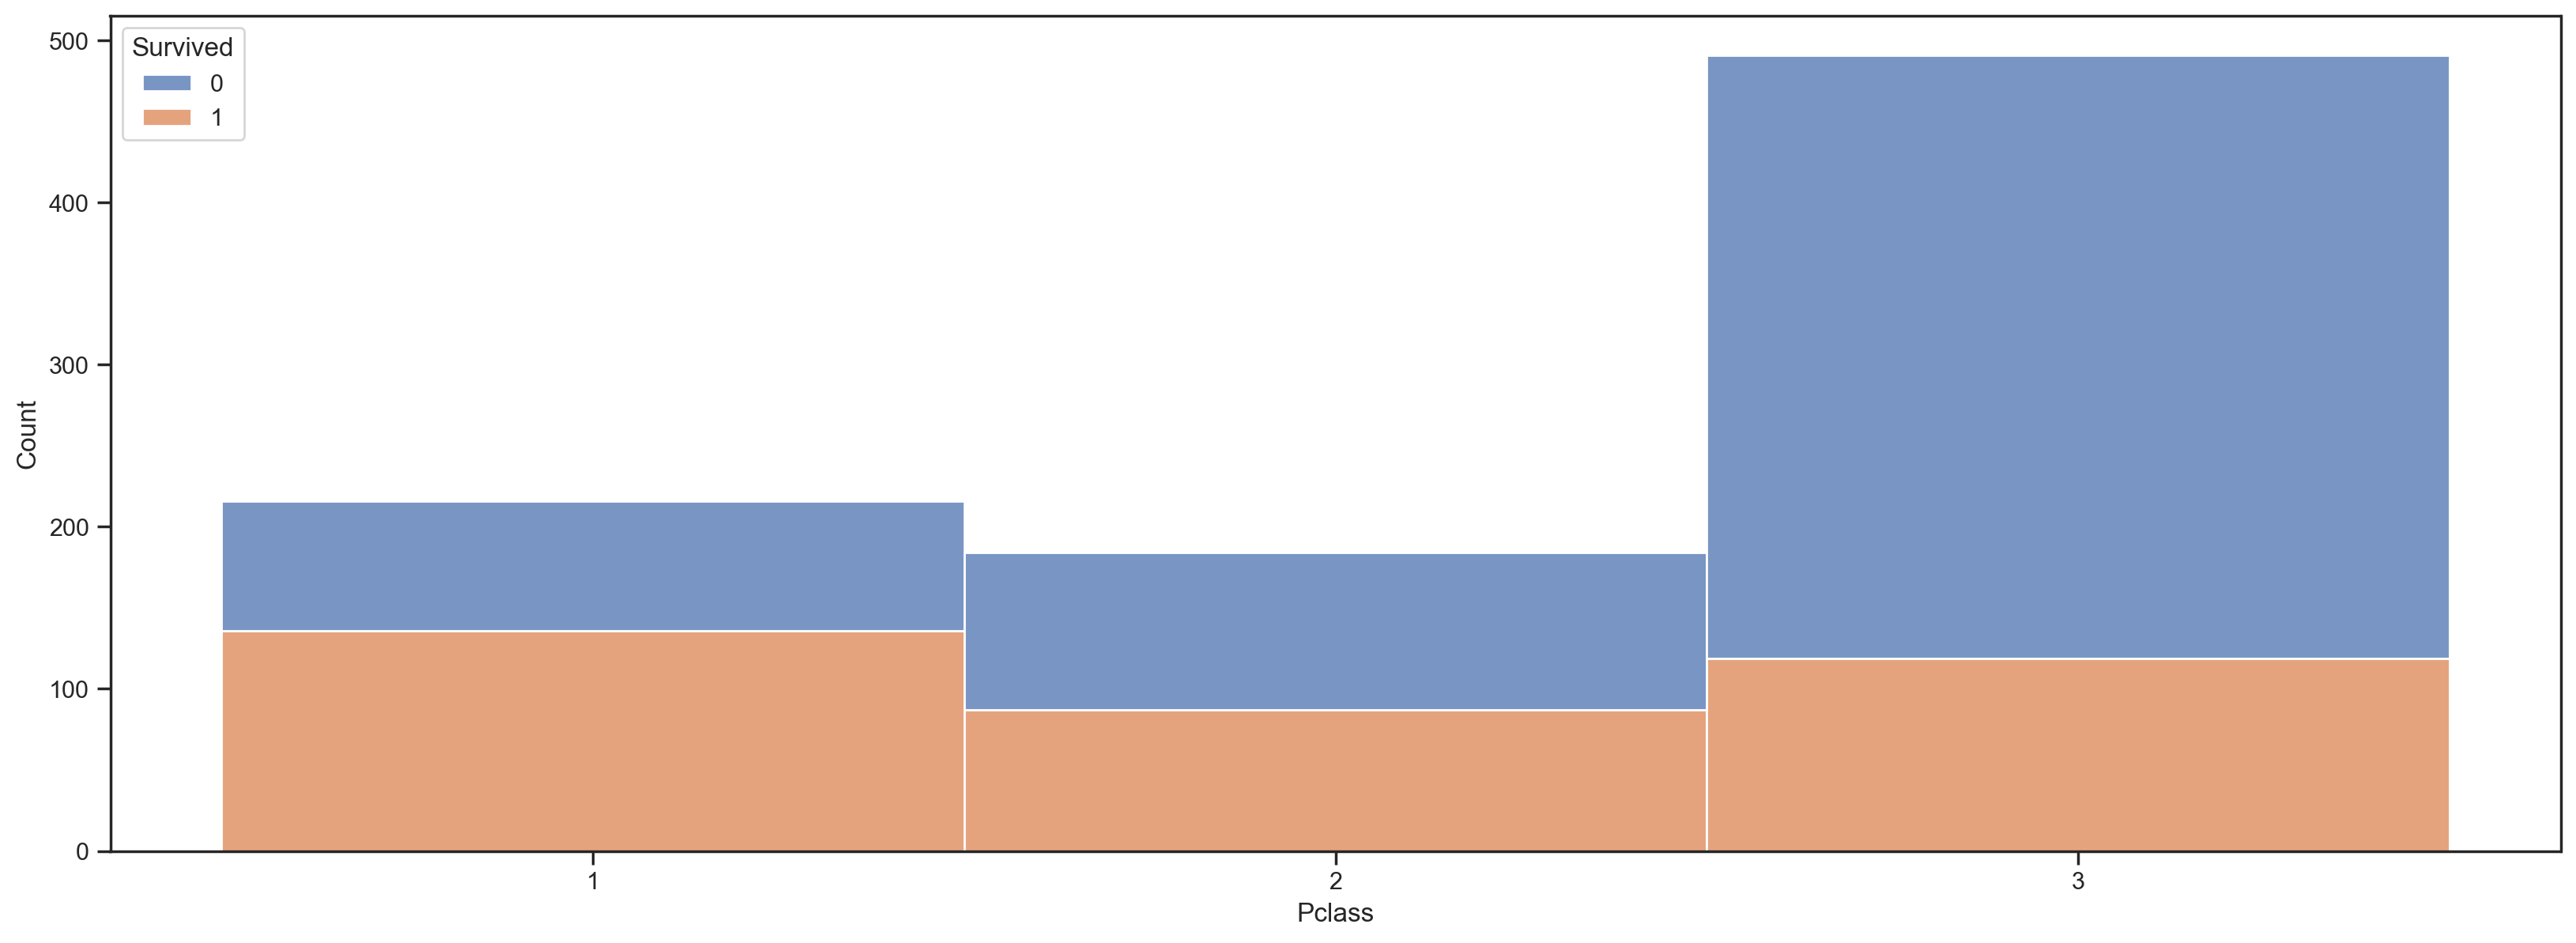

In [93]:
plt.figure(figsize=(20, 7))
ax = sns.histplot(data=df_train, x='Pclass', hue='Survived', multiple='stack', discrete=True)
ax.set_xticks([1, 2, 3])
plt.show()

In [94]:
for i in range(1, 4):
    survived = df_train[(df_train['Pclass'] == i) & (df_train['Survived'] == 1)].shape[0]
    total = df_train[df_train['Pclass'] == i].shape[0]
    print(f'{survived / total * 100 :.2f}% of the Pclass-{i} passengers survived.')

62.96% of the Pclass-1 passengers survived.
47.28% of the Pclass-2 passengers survived.
24.24% of the Pclass-3 passengers survived.


* Upper-class people survived more compared Middle and Lower class people.
* Maybe Upper-class people had a higher priority in the rescue process.

#### 2.2.4 Analysis of Survived and Embarked

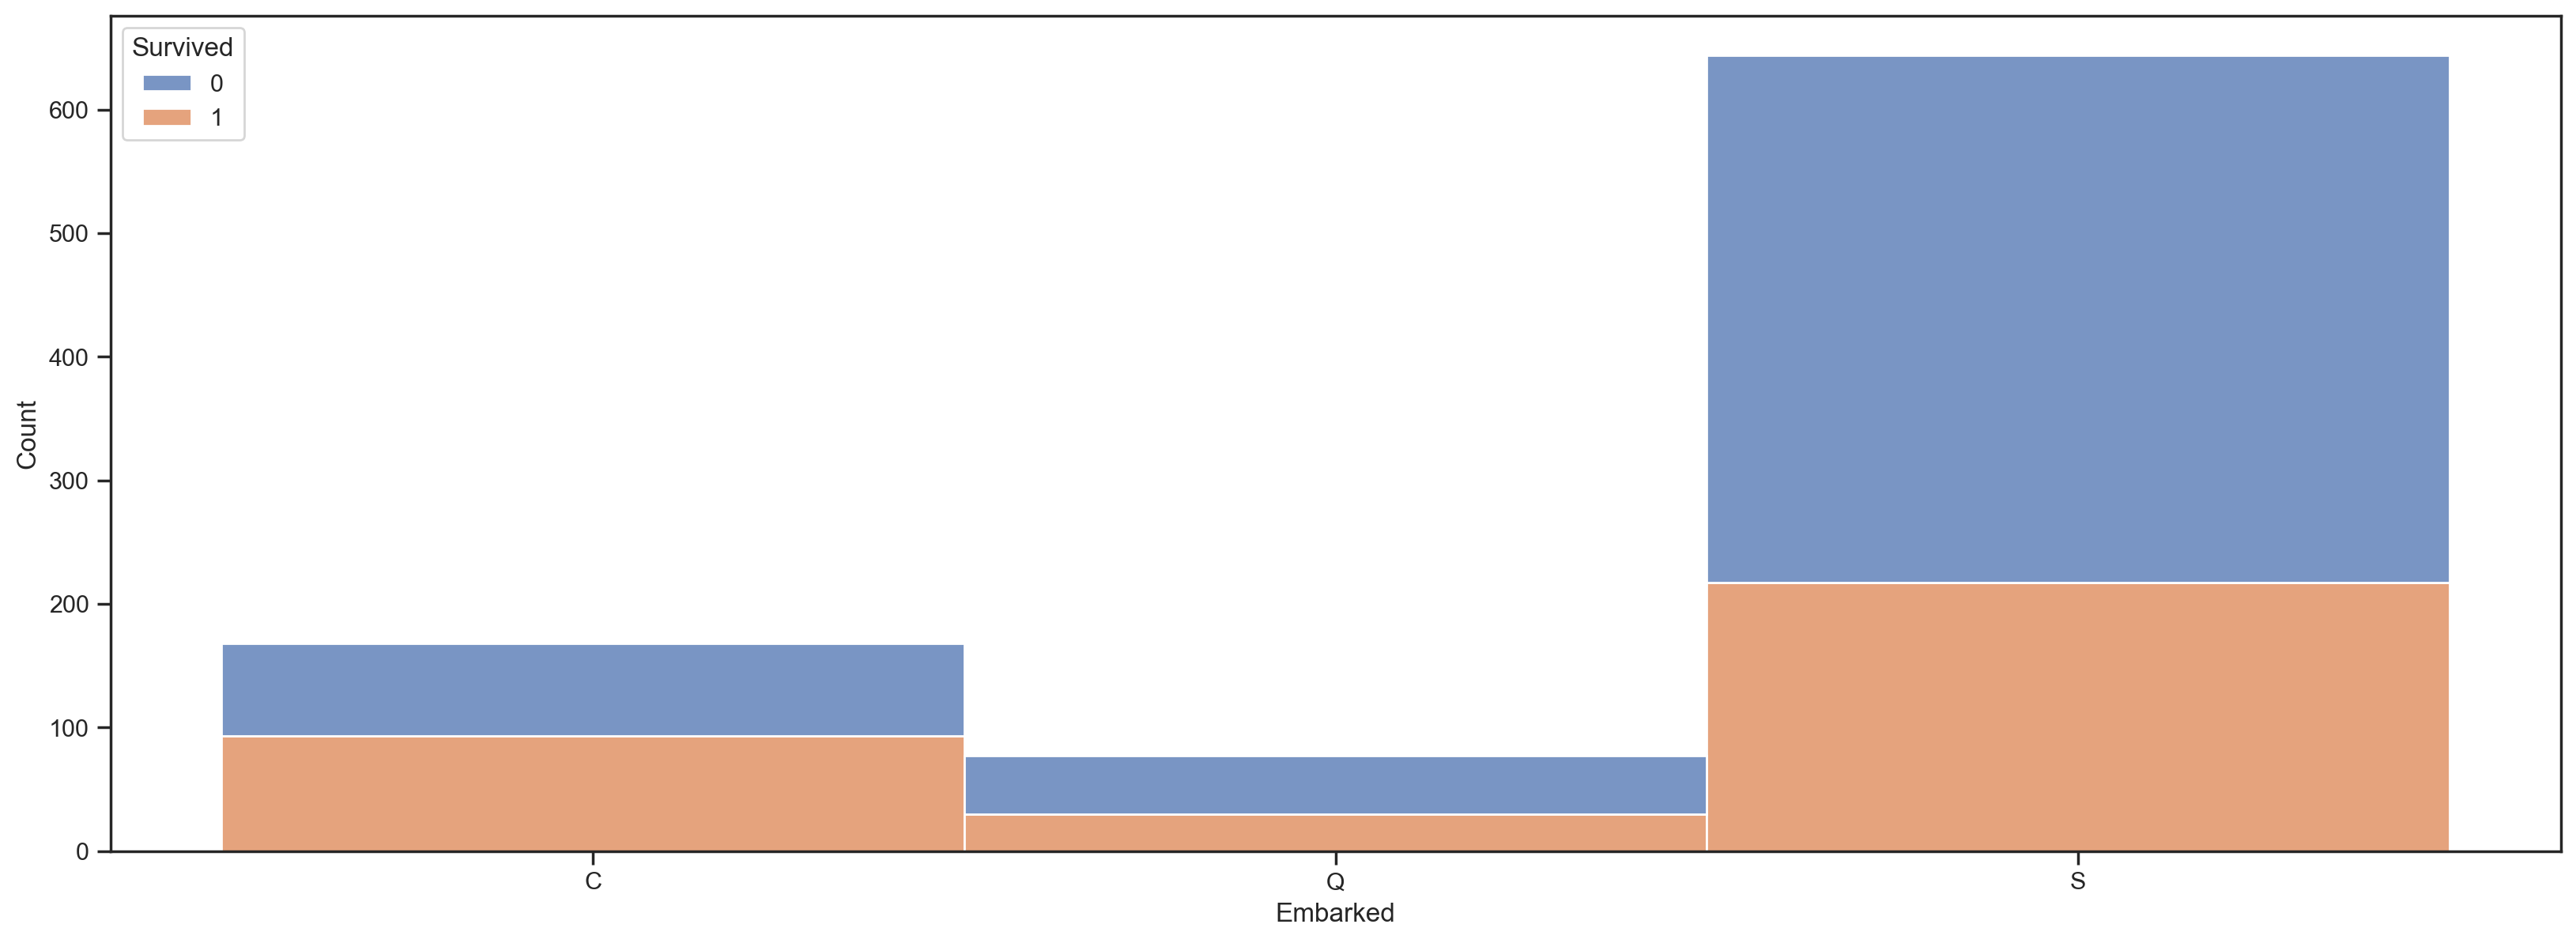

In [95]:
plt.figure(figsize=(20, 7))
ax = sns.histplot(data=df_train, x='Embarked', hue='Survived', multiple='stack', discrete=True)
plt.show()

In [97]:
for i, k in {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}.items():
    survived = df_train[(df_train['Embarked'] == i) & (df_train['Survived'] == 1)].shape[0]
    total = df_train[df_train['Embarked'] == i].shape[0]
    print(f'{survived / total * 100 :.2f}% of the passengers embarked in {k} survived.')

55.36% of the passengers embarked in Cherbourg survived.
38.96% of the passengers embarked in Queenstown survived.
33.70% of the passengers embarked in Southampton survived.


* Most of the passengers who survived are boarded from **Southampton**. This may be due to the fact that **Southampton** is the most crowded port.
* More than **50%** of the passengers who boarded from **Cherbourg** survived.